<a href="https://colab.research.google.com/github/Dirkster99/PyNotes/blob/master/Transformers/Issue/66_Multi_Label_German_text_classification_in_TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Label text classification in TensorFlow Keras
Article: 
https://androidkt.com/multi-label-text-classification-in-tensorflow-keras/


In this tutorial, We use pre-trained word embedding for Text classification.We will use the 100-dimensional GloVe embeddings of 400k words computed on a 2014 dump of English Wikipedia. You can download them here (glove.6B.100d.txt):
http://nlp.stanford.edu/data/glove.6B.zip

# Introduction

In this tutorial, we create a multi-label text classification model for predicts a probability of each type of toxicity for each comment. This model capable of detecting different types of toxicity like threats, obscenity, insults, and identity-based hate. We need to create a model which predicts a probability of each type of toxicity for each comment.

## Difference between multi-class and multi-label Classification

In **Multi-Class classification** there are more than 2 classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Each sample is assigned to one and only one label: a fruit can be either an apple or an orange.

In **Multi-Label classification**, each sample has a set of target labels. A comment might be threats, obscenity, insults, and identity-based hate at the same time or none of these.

Multi-class classification use **softmax activation** function in the output layer. The probability of each class is dependent on the other classes. As the probability of one class increases, the probability of the other class decreases.

The softmax activation function is not appropriate in Multi-label classification because it has more than one label for a single text. The probabilities are independent of each other. Here we **use the sigmoid activation function**. This will predict the probability for each class independently. 

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
dataPath = '/gdrive/MyDrive/GermanDataSets/German_News_Dataset/'
!ls {dataPath.replace(' ', '\ ')}  -lha

total 330M
-rw------- 1 root root 241M Mar 18 11:08  archive.zip
-rw------- 1 root root 850K Mar 18 18:53 'German MultiClass Reformating.ipynb'
-rw------- 1 root root  89M Mar 18 17:19  German_News_MultiClass.zip
-rw------- 1 root root   49 Mar 18 11:56  readme.txt


## Prepare Dataset

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

import os

myPath = "/gdrive/MyDrive/Colab Notebooks/MultiLabelText/ToxicComments/"
TRAIN_DATA = dataPath + "German_News_MultiClass.zip"
GLOVE_EMBEDDING = myPath + "data/embedding/glove.6B.100d.txt"

train = pd.read_csv(TRAIN_DATA)

In [ ]:
train.head()

,Unnamed: 0,text,tags,Ausland,Deutschland,Wirtschaft,Panorama,Sport,Coronavirus,Berlin,Politik,news
0,0,Im Kreml sollte es in diesen Tagen eigentlich ...,"Ausland, „Sputnik V“",1,0,0,0,0,0,0,0,0
1,1,Der Preis setze ein Zeichen für die Millionen ...,"Ausland, Oslo",1,0,0,0,0,0,0,0,0
2,2,Die Kanzlerin berät mit den Bürgermeistern der...,"Deutschland, Corona-Pandemie",0,1,0,0,0,0,0,0,0
3,3,Anzeige\n\nDie Corona-Krise hat auch vor dem e...,"Wirtschaft, FIFA 21 im Test",0,0,1,0,0,0,0,0,0
4,4,Anzeige\n\nEin Problem? Kein Problem. Natürlic...,"Panorama, Popkultur",0,0,0,1,0,0,0,0,0


In [ ]:
# Limit string length to conserve memory
train['text'] = train['text'].str.slice(0,3000)

In [ ]:
# replace NaN values with "fillna"
train["text"].fillna("fillna")

0        Im Kreml sollte es in diesen Tagen eigentlich ...
1        Der Preis setze ein Zeichen für die Millionen ...
2        Die Kanzlerin berät mit den Bürgermeistern der...
3        Anzeige\n\nDie Corona-Krise hat auch vor dem e...
4        Anzeige\n\nEin Problem? Kein Problem. Natürlic...
                               ...                        
64527    Börse in Frankfurt : Dax knapp im Minus vor No...
64528    Corona-Krise : Keine Zuschauer bis Ende Oktobe...
64529    Risiko zu groß : Amateurclubs verzichten auf D...
64530    Vereinbarung unterzeichnet : „Marathonlauf“ fü...
64531    FC Groningen : Robben verzichtet auf Testspiel...
Name: text, Length: 64532, dtype: object

In [ ]:
labels = ['Ausland', 'Deutschland', 'Wirtschaft', 'Panorama', 'Sport', 'Coronavirus', 'Berlin', 'Politik', 'news']
train['text'] = train.text.astype(str)

x_train = train["text"].str.lower()
y_train = train[labels].values

In [ ]:
print(type(x_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
x_train.head()

0    im kreml sollte es in diesen tagen eigentlich ...
1    der preis setze ein zeichen für die millionen ...
2    die kanzlerin berät mit den bürgermeistern der...
3    anzeige\n\ndie corona-krise hat auch vor dem e...
4    anzeige\n\nein problem? kein problem. natürlic...
Name: text, dtype: object

In [ ]:
print(y_train)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
max_words = 100000
max_len = 100
embed_size = 100

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, lower=True)

tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)


In [ ]:
print('x_train shape :' + str(x_train.shape))
print(' x_train size :' + str(len(x_train)))
print('x_train items :')

print (x_train[0])


x_train shape :(64532, 100)
 x_train size :64532
x_train items :
[    0     0     0     0     0     0    10  2070   240    13     4   301
   278   397   904  1663    12 12389   297    33   257    37   774  2543
     1   351   108     4   512  2179 12206    84     4   311    24   198
   190    32    14     1   195     2   337    11   363   540  1743   323
   215    45    24  5724     3   268    75    11    20  2122     2 19256
     7   619     1   597   988    15     4   512  3817    84 10077    48
   417  1410   411     2  1216   645   104    14   335  1449  2776  1432
 14000 74583  1615     1   521     5  2297 11958   126   202   512    33
    36 17346 50879  1514]


In [ ]:
#x_train_sz = len(x_train)
#x_train = x_train.reshape(1, x_train_sz, 150)


In [ ]:
#print('x_train shape: ' + str(x_train.shape))
#print(' x_train size: ' + str(len(x_train)))


## Use pre-train embeddings

In this tutorial, We use pre-trained word embedding for Text classification.We will use the 100-dimensional GloVe embeddings of 400k words computed on a 2014 dump of English Wikipedia. You can download them here: http://nlp.stanford.edu/data/glove.6B.zip

we compute an index mapping words to known embeddings, by parsing the data dump of pre-trained embeddings:

In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    """ Load only word embeddings for thos word that occur in the corpus
    """
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
embedding_matrix = create_embedding_matrix(GLOVE_EMBEDDING, tokenizer.word_index, embed_size)

# adjust max number of words to actual number of words
max_words = len(embedding_matrix)

## Bidirectional Layer

It propagates the input forward and backward through the RNN layer and then concatenates the output. This helps the RNN to learn long range dependencies.

In [ ]:
#
# https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35
#
# 
#
def create_Bidirectional_LSTM_model(categories, distribute_strategy):

  with distribute_strategy.scope():
    model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(max_words, embed_size, weights=[embedding_matrix], trainable=False),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embed_size, recurrent_dropout=0.1)), # dropout=0.1

    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embed_size, activation='relu'),
    
    # Add a Dense layer with n units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(categories, activation='sigmoid')
    ])

    print(model.summary())

    # sparse_categorical_crossentropy
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=1e-3), metrics=['accuracy'])

  return model

In [ ]:
strategy = tf.distribute.MirroredStrategy()
model = create_Bidirectional_LSTM_model(len(labels), strategy)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         35617100  
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 909       
Total params: 35,798,909
Trainable params: 181,809
Non-trainable params: 35,617,100
_________________________________________________________________
None
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device

Here we use sigmoid activation instead of softmax for output layer and binary_crossentropy for loss function.

## Train Model

In [ ]:
batch_size = 128

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=9, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    cp_callback
]

history = model.fit(x_train, y_train, validation_split=0.2, batch_size=batch_size,
          epochs=32, callbacks=callbacks, verbose=1)

Epoch 1/32
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
404/404 [==============================] - 216s 515ms/step - loss: 0.3513 - accuracy: 0.2709 - val_loss: 0.3346 - val_accuracy: 0.1737

Epoch 00001: 

## Evaluation

## Predictions

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

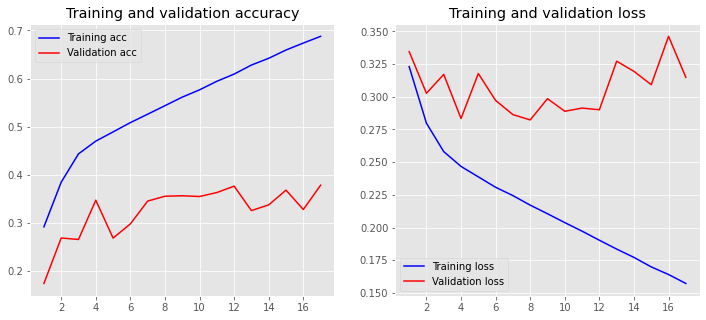

In [ ]:
#loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

#print("Training Accuracy: {:.4f}".format(accuracy))
#print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
def EvaluateLabeledPrediction(threshold, predictions, labelsData):
  for i in range(len(labels)):
    if (predictions[0][i] >= threshold and labelsData[i] == 1):
      print ("{:02d}".format(i) + "  TRUE " + str(labelsData[i]) + " -> " + "{0:.6f}".format(predictions[0][i]) + ": " + labels[i])
    elif (predictions[0][i] >= threshold and labelsData[i] == 0):
      print ("{:02d}".format(i) + " FALSE " + str(labelsData[i]) + " -> " + "{0:.6f}".format(predictions[0][i]) + ": " + labels[i])
    elif (predictions[0][i] < threshold and labelsData[i] == 0):
      print ("{:02d}".format(i) + "       " + str(labelsData[i]) + " -> " + "{0:.6f}".format(predictions[0][i]) + ": " + labels[i])
    elif (predictions[0][i] < threshold and labelsData[i] == 1):
      print ("{:02d}".format(i) + " FALSE " + str(labelsData[i]) + " -> " + "{0:.6f}".format(predictions[0][i]) + ": " + labels[i])

  return None

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

model.load_weights(latest)

idx = 43
predictions = model.predict(np.expand_dims(x_train[idx], 0))

print(tokenizer.sequences_to_texts([x_train[idx]]))
print(y_train[idx])
print(predictions)

EvaluateLabeledPrediction(threshold = .6, predictions=predictions, labelsData=y_train[idx])

['mit inhalten aus twitter und anderen sozialen netzwerken zu interagieren oder diese darzustellen brauchen wir ihre zustimmung soziale netzwerke aktivieren plasberg hielt das für einen witz „das haben sie sich doch ausgedacht “ weiler lachte blieb aber dabei dass er das wirklich so gehört habe in dem fall hilft wohl auch kein faktencheck generell lag die stärke von weiler und von der lippe an diesem abend eher im was zwar für mehr aufregung jedoch keine tiefere erkenntnis sorgte knigge der sprache anzeige publizistin lohaus stellte sich komplett gegen die behauptung dass sprache unschuldig sei konstituiert unser denken und unsere sagt']
[0 0 0 1 0 0 0 0 0]
[[0.02088303 0.09821796 0.02146741 0.8142499  0.00879554 0.07683036
  0.00654718 0.06490186 0.04125369]]
00       0 -> 0.020883: Ausland
01       0 -> 0.098218: Deutschland
02       0 -> 0.021467: Wirtschaft
03  TRUE 1 -> 0.814250: Panorama
04       0 -> 0.008796: Sport
05       0 -> 0.076830: Coronavirus
06       0 -> 0.006547: Ber

In [ ]:
for i in range(32):
  predictions = model.predict(np.expand_dims(x_train[i], 0))

  print(tokenizer.sequences_to_texts([x_train[i]]))
  print(y_train[i])
  print(predictions)

  EvaluateLabeledPrediction(threshold = .5, predictions=predictions, labelsData=y_train[i])

['im kreml sollte es in diesen tagen eigentlich genug gründe für aufruhr geben vor gerade einem monat schien die covid pandemie in russland nahezu eingedämmt doch in weniger als vier wochen hat sich die zahl der neuinfektionen auf knapp 11 600 pro tag mehr als verdoppelt und liegt nun auf dem niveau der rekordwerte von mai die zweite welle ist in russland angekommen doch geredet wird darüber überraschend wenig der russische staat gibt sich bislang betont gelassen gesundheitsminister michail muraschko nennt die situation das klingt selbstbewusst dabei steht russland vor einer schier unmöglichen aufgabe']
[1 0 0 0 0 0 0 0 0]
[[3.9636174e-01 1.1760422e-02 4.1598912e-02 4.6448652e-02 2.1049133e-04
  5.4269761e-02 2.3032591e-04 1.2658955e-01 2.6587498e-01]]
00 FALSE 1 -> 0.396362: Ausland
01       0 -> 0.011760: Deutschland
02       0 -> 0.041599: Wirtschaft
03       0 -> 0.046449: Panorama
04       0 -> 0.000210: Sport
05       0 -> 0.054270: Coronavirus
06       0 -> 0.000230: Berlin
07  

In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 1 sample")
predictions = model.predict(test.take(1))
print("predictions shape:", predictions.shape)

Generate predictions for 1 sample
predictions shape: (32, 9)
